In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [16]:
unemployment_csv = '../Data/Unemployment.csv'
df = pd.read_csv(unemployment_csv)
df.head()

,Date,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,2004-01-01,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,...,3.5,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1
1,2004-02-01,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,...,3.5,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0
2,2004-03-01,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,...,3.5,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9
3,2004-04-01,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,...,3.5,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9
4,2004-05-01,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,...,3.6,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8


In [17]:
df['Year'] = df['Date'].str.split('-', expand=True)[0]
df.drop(columns=['Date'], inplace= True)
df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year
0,5.9,7.6,5.4,5.7,6.6,5.8,5.3,4.1,7.4,4.0,...,5.3,6.3,5.3,4.0,4.2,6.8,6.1,5.2,4.1,2004
1,5.9,7.6,5.3,5.7,6.5,5.8,5.3,4.1,7.6,4.0,...,5.2,6.2,5.3,4.0,4.2,6.7,6.0,5.2,4.0,2004
2,5.8,7.6,5.3,5.7,6.5,5.7,5.2,4.2,7.8,3.9,...,5.1,6.2,5.3,3.9,4.2,6.6,6.0,5.1,3.9,2004
3,5.8,7.6,5.2,5.7,6.4,5.6,5.2,4.2,7.9,3.9,...,5.1,6.1,5.2,3.8,4.2,6.5,5.9,5.1,3.9,2004
4,5.7,7.5,5.1,5.7,6.4,5.6,5.2,4.2,8.1,3.9,...,5.1,6.1,5.2,3.8,4.2,6.4,5.8,5.0,3.8,2004


In [18]:
year_grp = df.groupby('Year').sum()
year_grp.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
2004,66.9,89.0,59.6,67.0,74.6,66.8,61.1,51.6,97.0,45.0,...,43.3,64.2,72.2,60.1,44.1,49.0,75.6,69.2,59.7,46.1
2005,53.5,83.2,56.0,63.1,64.6,60.9,57.6,54.1,83.9,34.5,...,42.6,66.3,65.5,48.5,41.4,45.9,67.1,65.1,56.9,42.5
2006,48.0,79.6,51.7,63.0,59.0,51.3,53.1,46.9,75.9,29.6,...,36.0,63.3,60.0,34.4,44.6,40.1,60.0,62.4,56.1,36.1
2007,48.5,75.1,45.0,64.7,63.7,44.4,53.4,43.3,71.4,39.6,...,33.9,55.6,52.4,30.7,47.3,39.4,55.2,57.9,57.9,32.3
2008,70.6,77.7,69.5,65.3,87.6,58.5,67.8,60.4,82.2,68.3,...,37.0,78.2,58.4,40.1,54.8,51.3,63.5,57.0,59.8,35.2


In [19]:
year_grp['Total'] = year_grp.sum(axis=1)
year_grp.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Total
Year,,,,,,,,,,,,,,,,,,,,,
2004,66.9,89.0,59.6,67.0,74.6,66.8,61.1,51.6,97.0,45.0,...,64.2,72.2,60.1,44.1,49.0,75.6,69.2,59.7,46.1,3212.6
2005,53.5,83.2,56.0,63.1,64.6,60.9,57.6,54.1,83.9,34.5,...,66.3,65.5,48.5,41.4,45.9,67.1,65.1,56.9,42.5,3035.5
2006,48.0,79.6,51.7,63.0,59.0,51.3,53.1,46.9,75.9,29.6,...,63.3,60.0,34.4,44.6,40.1,60.0,62.4,56.1,36.1,2751.4
2007,48.5,75.1,45.0,64.7,63.7,44.4,53.4,43.3,71.4,39.6,...,55.6,52.4,30.7,47.3,39.4,55.2,57.9,57.9,32.3,2677.4
2008,70.6,77.7,69.5,65.3,87.6,58.5,67.8,60.4,82.2,68.3,...,78.2,58.4,40.1,54.8,51.3,63.5,57.0,59.8,35.2,3282.7


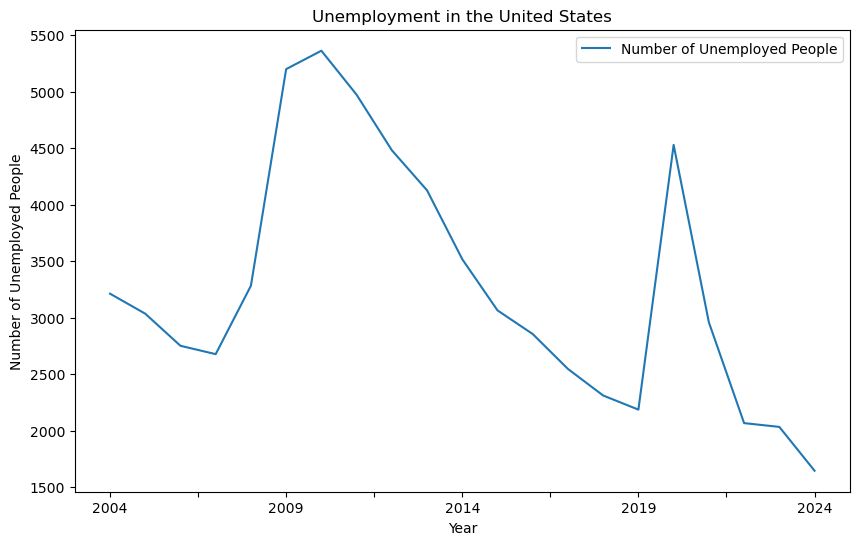

In [20]:
overall_unemployed = pd.DataFrame({'Number of Unemployed People': year_grp['Total']}, index=df['Year'].unique())
us_plot = overall_unemployed.plot(kind='line', title='Unemployment in the United States', 
                                  xlabel='Year', ylabel='Number of Unemployed People', figsize=(10, 6));
fig1 = us_plot.get_figure()
fig1.savefig('Visualizations/US_unemployment_per_year.png')

In [21]:
states = df.columns.unique()
states = states.drop('Year')
states_totals = pd.DataFrame({'State': states,
                              'Total Unemployed': df[states].sum()})
states_totals.head()

,State,Total Unemployed
Alabama,Alabama,1402.5
Alaska,Alaska,1634.3
Arizona,Arizona,1503.5
Arkansas,Arkansas,1316.1
California,California,1770.6


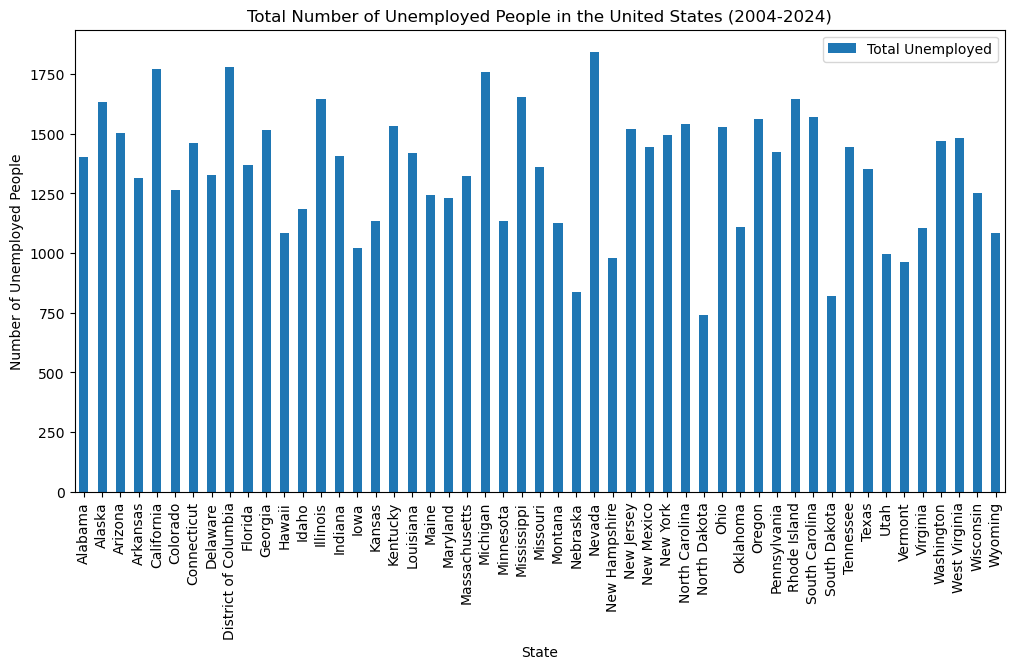

In [22]:
unemployment_plot = states_totals.plot(kind='bar', title='Total Number of Unemployed People in the United States (2004-2024)',
                                       xlabel='State', ylabel='Number of Unemployed People', figsize=(12, 6));
fig2 = unemployment_plot.get_figure()
fig2.savefig('Visualizations/US_unemployment_per_state.png')